In [50]:
from qiskit import QuantumCircuit, Aer, assemble, IBMQ, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit.circuit import Gate
import qiskit.extensions as q_ext
from qiskit.quantum_info import Statevector
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.exceptions import QiskitError

from qiskit import QuantumCircuit, QuantumRegister,\
    ClassicalRegister,transpile, Aer, IBMQ,execute
from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()


import matplotlib.pyplot as plt
import numpy as np
from math import pi


## Graph-Färbe-Probleme

Bei einem Graph-F#rbe-Problem wird die Frage gestellt, **wie man die Knoten eines Graphs so ”einfärben“ kann, dass keine zwei benachbarten Knoten dieselbe Farbe haben.**

**”Benachbart“** heißt, dass die Knoten durch eine **Kante verbunden** sind.


Bei den folgenden Graphen **G = (V, E)** sind manche Knoten **schon gefärbt**. Verwenden Sie **Grovers Algorithmus**, um eine **gultige Färbung fur die restlichen Knoten zu finden.** Sie müssen sich dabei uberlegen, wie Sie die Knoten und Kanten darstellen und wie Sie die Farben codieren.


### Aufgabe 1.6: 4 Knoten, 2 Farben
In dieser Aufgabe gibt es nur die Farben B und Y.\
**V = {0, 1, 2, 3}\
E = {(0, 1),(1, 2)(2, 3),(3, 0)}\
F = {(0, B),(1, Y )}**

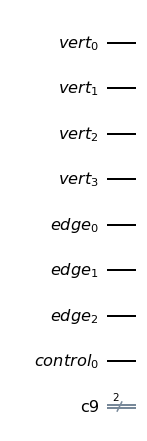

In [51]:
vert = QuantumRegister(4, name ='vert')
edg = QuantumRegister(3, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(2)

qc = QuantumCircuit(vert, edg, contr, cr)
qc.draw('mpl')

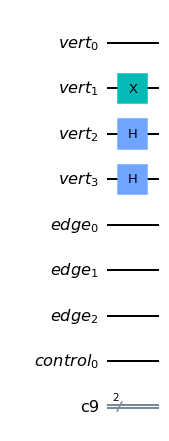

In [52]:
#color coding: 0-> blue, 1-> yellow
#vertices 0 (blue) and 1 (yellow) are known
qc.x(vert[1])
#the rest are unknown: apply H
qc.h(vert[2])
qc.h(vert[3])
qc.draw('mpl')

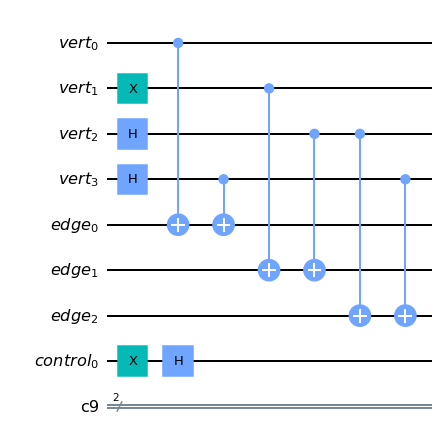

In [53]:
#set control qubit in state |->
qc.x(contr)
qc.h(contr)
#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
qc.draw('mpl')

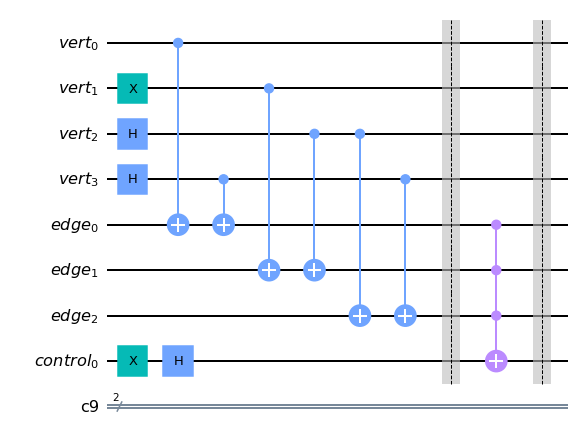

In [54]:
#add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
qc.barrier()
qc.mcx(edg,contr)
qc.barrier()
qc.draw('mpl')

In [55]:

#reverse edge encoding
qc.cx(vert[3],edg[2])
qc.cx(vert[2],edg[2])
qc.cx(vert[2],edg[1])
qc.cx(vert[1],edg[1])
qc.cx(vert[3],edg[0])
qc.cx(vert[0],edg[0])
qc.barrier()


In [56]:
def reflection(qc,x):
    '''Performs reflection around state |0>: adds a negative phase only to state |0>'''
    qc.x(x) #apply X to whole register
    qc.h(x[-1])#apply hadamard to last qubit
    qc.mcx(x[:-1],x[-1]) #apply multi control x gate
    qc.h(x[-1])
    qc.x(x)
    
def diffuser(qc,x):
    '''Transforms superposition state |s> -> |0>, reflects about |0>
    and transforms back to |s> again.'''
    qc.h(x)
    reflection(qc,x)
    qc.h(x)

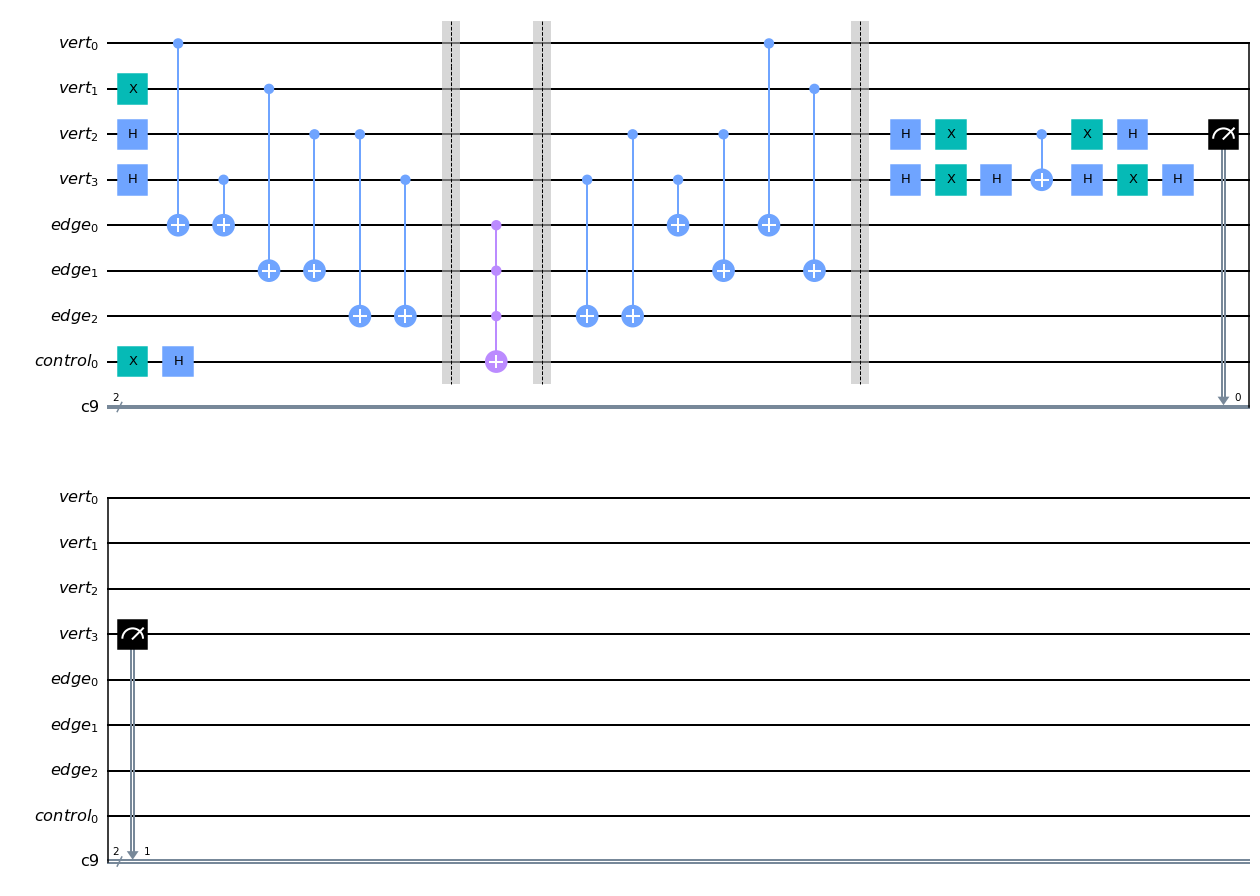

In [57]:
#diffuser
diffuser(qc,vert[2:])
qc.measure(vert[2:],cr)
qc.draw('mpl')

In [49]:
for kk in range(4):
    trans_qc = transpile(qc, basis_gates=['cx', 'u3'], optimization_level=kk)
    
    #display(trans_qc.draw())
    print('Optimization Level {}'.format(kk))
    print('Depth:', trans_qc.depth())
    print('Gate counts:', trans_qc.count_ops())

Optimization Level 0
Depth: 114
Gate counts: OrderedDict([('u3', 107), ('cx', 59), ('measure', 3), ('barrier', 2)])
Optimization Level 1
Depth: 90
Gate counts: OrderedDict([('u3', 61), ('cx', 59), ('measure', 3), ('barrier', 2)])
Optimization Level 2
Depth: 90
Gate counts: OrderedDict([('u3', 61), ('cx', 59), ('measure', 3), ('barrier', 2)])
Optimization Level 3
Depth: 90
Gate counts: OrderedDict([('u3', 61), ('cx', 59), ('measure', 3), ('barrier', 2)])


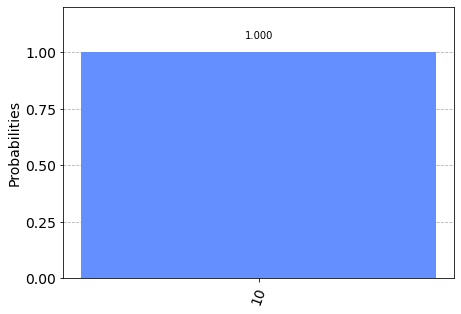

In [39]:
#run on simulator
backend = Aer.get_backend('qasm_simulator') 
result = execute(qc, backend).result()

plot_histogram(result.get_counts())

### Wie verändert sich der Lösungsweg, wenn Sie die Farbe von Knoten 1 noch nicht kennen?

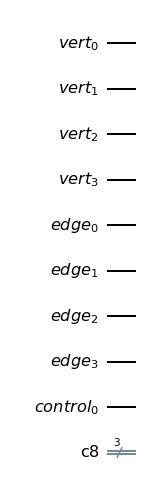

In [40]:
vert = QuantumRegister(4, name ='vert')
edg = QuantumRegister(4, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(3)

qc = QuantumCircuit(vert, edg, contr, cr)
qc.draw('mpl')

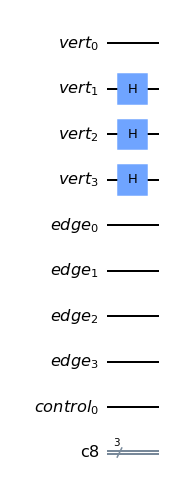

In [41]:
#color coding: 0-> blue, 1-> yellow
#vertices 0 (blue) 
#the rest are unknown: apply H
qc.h(vert[1])
qc.h(vert[2])
qc.h(vert[3])
qc.draw('mpl')

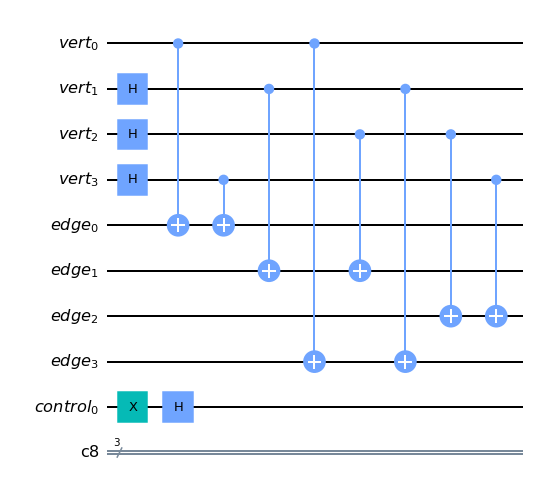

In [42]:
#set control qubit in state |->
qc.x(contr)
qc.h(contr)

#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
#0-1
qc.cx(vert[0],edg[3])
qc.cx(vert[1],edg[3])
qc.draw('mpl')

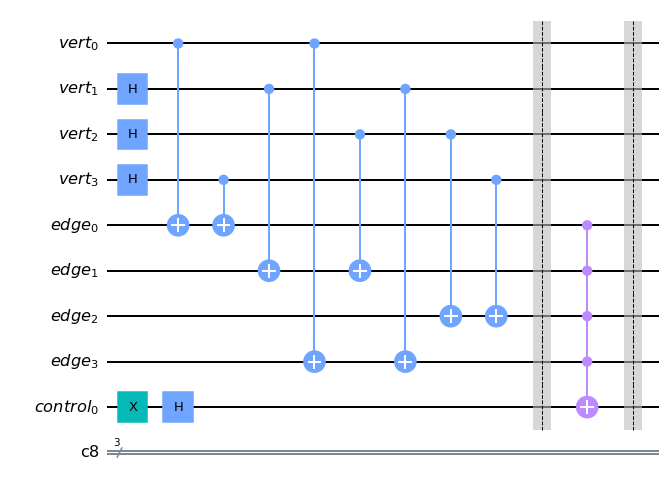

In [43]:
#add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
qc.barrier()
qc.mcx(edg,contr)
qc.barrier()
qc.draw('mpl')

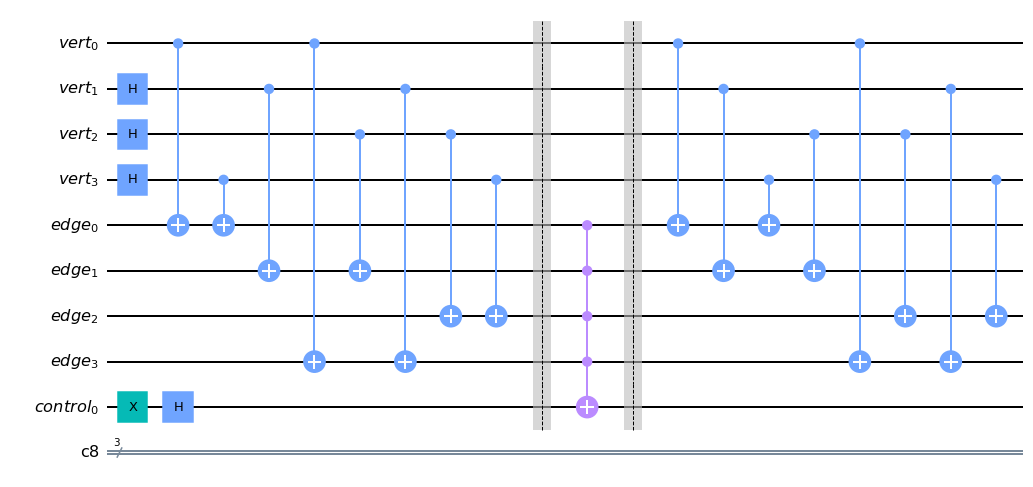

In [44]:
#reverse ding für edges

#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
#0-1
qc.cx(vert[0],edg[3])
qc.cx(vert[1],edg[3])
qc.draw('mpl')

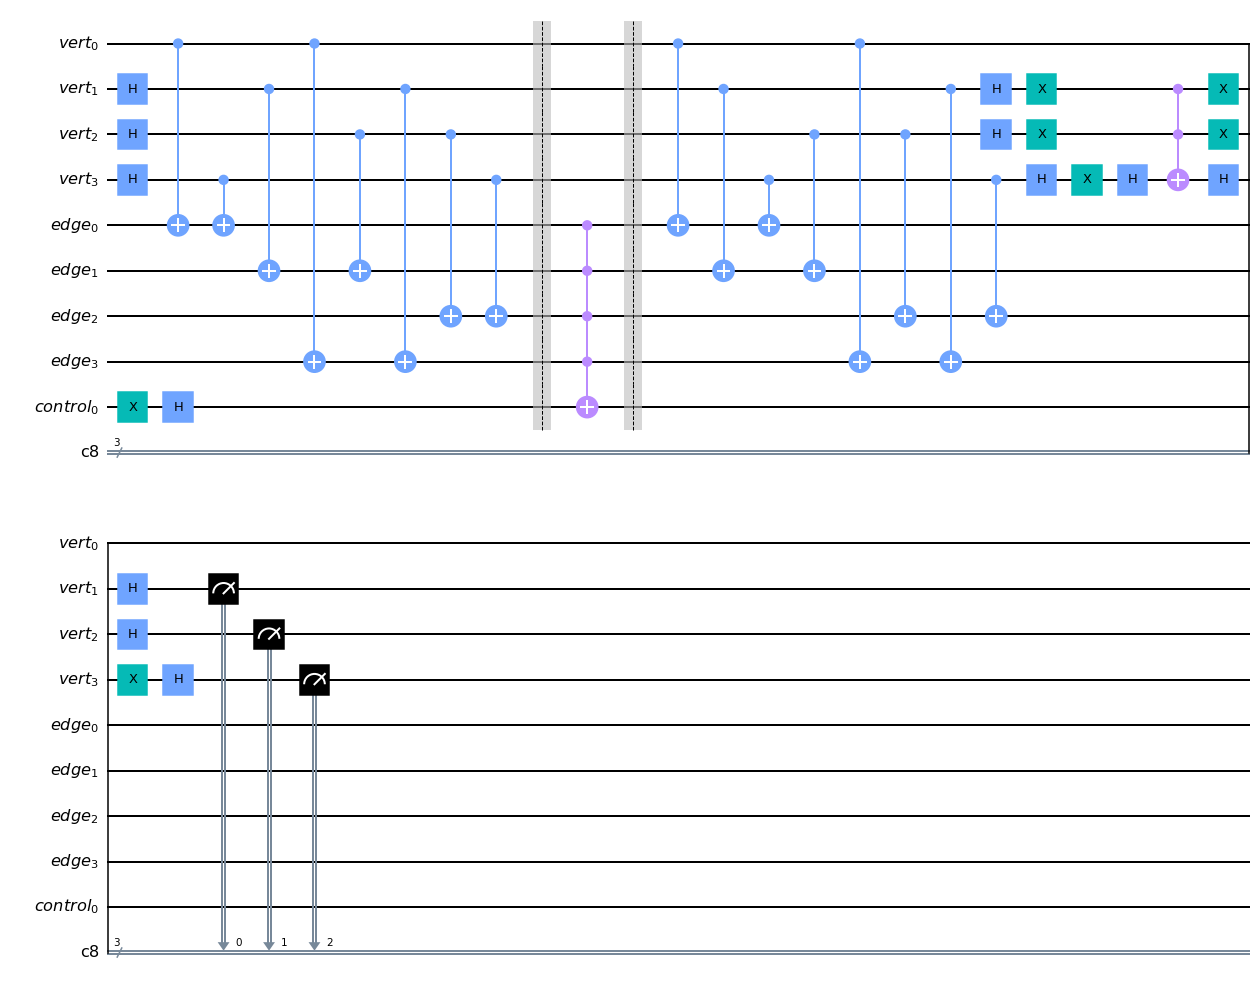

In [45]:
#diffuser
diffuser(qc,vert[1:])
qc.measure(vert[1:],cr)
qc.draw('mpl')

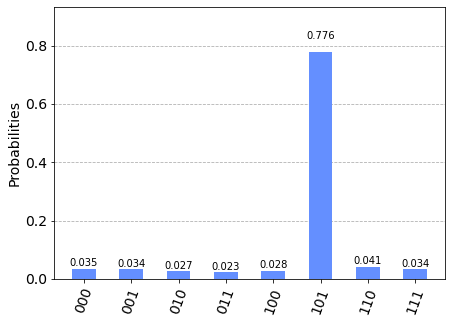

In [46]:
#run on simulator
backend = Aer.get_backend('qasm_simulator') 
result = execute(qc, backend).result()

plot_histogram(result.get_counts())